In [1]:
from src import functions as fn

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Global Variables
stock_name = 'amd' # ticker symbol
train = 0 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1, 3, or 5 days ahead
days_back = -1 # -1 for current data point, -2 for two days ago, etc...
cv = 3 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'a': '11/15/1999' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'aapl': '12/12/1980' # Updated 11/8/21 1D, 3D, 5D ahead
               #, 'acy': '01/18/1998' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'adbe': '08/11/1986' # Updated 11/8/21 1D, 3D, 5D ahead
               #, 'alb': '02/21/1994' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'amat': '03/16/1980' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'amd': '03/17/1980' # Updated 11/23/21 1D, 3D, 5D ahead
               , 'amgn': '06/13/1983' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'amzn': '05/12/1997' # Updated 11/07/21 1D, 3D, 5D ahead
               , 'baba': '09/15/2014' # Updated 11/13/21 1D, 3D, 5D ahead
               , 'bac': '02/19/1973' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'bby': '04/15/1985' # Updated 11/19/21 1D, 3D, 5D ahead
               #, 'bpmc': '04/27/2015' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'crm': '06/23/2004' # Updated 11/13/21 1D, 3D, 5D ahead
               , 'crsp': '10/16/2016' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'cost': '07/07/1986' # Updated 11/23/21 1D, 3D, 5D ahead
               , 'dis': '10/27/2014' # Updatd 11/5/21 1D, 3D, 5D ahead
               #, 'dq': '10/04/2010' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'esgv': '09/16/2018' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'fslr': '11/12/2006' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'goog': '08/16/2004' # Updated 11/8/21 1D, 3D, 5D ahead
               , 'ibm': '01/02/1962' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'intc': '03/16/1980' # Updated 11/13/21 1D, 3D, 5D ahead
               , 'iyw': '05/15/2000' # Updated 11/21/21 1D, 3D, 5D ahead
               , 'll': '11/05/2007' # Updated 11/22/21 1D, 3D, 5D ahead
               , 'lng': '04/04/1994' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'ma': '05/21/2006' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'mdb': '10/15/2017' # Updated 11/21/21 1D, 3D, 5D ahead
               , 'msft': '03/10/1986' # Updated 11/8/21 1D, 3D, 5D ahead
               , 'mu': '05/28/1984' # Updated 11/20/21 1D, 3D, 5D ahead
               #, 'nee': '02/19/1973' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'nio': '09/10/2018' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'nvda': '01/22/1999' # Updated 11/17/21 1D, 3D, 5D ahead
               #, 'pacb': '10/25/2010' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'pypl': '07/05/2015' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'qgen': '06/24/1996' # Updated 4/26/21 1D, 3D, 5D ahead
               #, 'run': '08/02/2015' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'okta': '04/03/2017' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'orcl': '03/10/1986' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'qcom': '12/09/1991' # Updated 11/20/21 1D, 3D, 5D ahead
               , 'qqq': '03/08/1999' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'srpt': '06/02/1997' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'tgt': '02/19/1973' # Updated 11/22/21 1D, 3D, 5D ahead
               #, 'tpic': '07/17/2016' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'tsla': '06/29/2010' # Updated 11/07/21 1D, 3D, 5D ahead
               , 'tsm': '10/06/1997' # Updated 11/20/21 1D, 3D, 5D ahead
               , 'v': '03/16/2008' # Updated 11/22/21 1D, 3D, 5D ahead
               , 'vbiv': '09/04/2002' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'vbr': '01/26/2004' # Updated 11/20/21 1D, 3D, 5D ahead
               , 'viov': '09/06/2010' # Updated 4/26/21 1D, 3D, 5D ahead
               , 'vgt': '01/26/2004' # Updated 11/07/21 1D, 3D, 5D ahead
               , 'wmt': '11/10/2014' # Updated 11/16/21 1D, 3D, 5D ahead
               , 'xlk': '12/21/1998' # Updated 11/21/21 1D, 3D, 5D ahead
              }

In [4]:
from datetime import date, datetime
today = date.today()
print("Today's date:", today)
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Start Time: ", current_time)

fn.get_tables(start_dates)
print('Table Updates Complete')

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current End Time: ", current_time)

Today's date: 2022-01-07
Current Start Time:  00:39:07
Table Updates Complete
Current End Time:  00:39:28


In [5]:
len(start_dates)

45

In [6]:
import itertools as itr
start_dates1 = dict(itr.islice(start_dates.items(), 0, 15))
start_dates1

{'a': '11/15/1999',
 'aapl': '12/12/1980',
 'adbe': '08/11/1986',
 'amat': '03/16/1980',
 'amd': '03/17/1980',
 'amgn': '06/13/1983',
 'amzn': '05/12/1997',
 'baba': '09/15/2014',
 'bac': '02/19/1973',
 'bby': '04/15/1985',
 'crm': '06/23/2004',
 'crsp': '10/16/2016',
 'cost': '07/07/1986',
 'dis': '10/27/2014',
 'esgv': '09/16/2018'}

In [7]:
start_dates2 = dict(itr.islice(start_dates.items(), 15, 30))
start_dates2

{'fslr': '11/12/2006',
 'goog': '08/16/2004',
 'ibm': '01/02/1962',
 'intc': '03/16/1980',
 'iyw': '05/15/2000',
 'll': '11/05/2007',
 'lng': '04/04/1994',
 'ma': '05/21/2006',
 'mdb': '10/15/2017',
 'msft': '03/10/1986',
 'mu': '05/28/1984',
 'nio': '09/10/2018',
 'nvda': '01/22/1999',
 'pypl': '07/05/2015',
 'qgen': '06/24/1996'}

In [8]:
start_dates3 = dict(itr.islice(start_dates.items(), 30, 45+1))
start_dates3

{'okta': '04/03/2017',
 'orcl': '03/10/1986',
 'qcom': '12/09/1991',
 'qqq': '03/08/1999',
 'srpt': '06/02/1997',
 'tgt': '02/19/1973',
 'tsla': '06/29/2010',
 'tsm': '10/06/1997',
 'v': '03/16/2008',
 'vbiv': '09/04/2002',
 'vbr': '01/26/2004',
 'viov': '09/06/2010',
 'vgt': '01/26/2004',
 'wmt': '11/10/2014',
 'xlk': '12/21/1998'}

In [9]:
# import timeit
# from datetime import datetime, date
# today = date.today()
# now = datetime.now()

# current_time = now.strftime("%H:%M:%S")
# print("Gridsearch Start Date: ", today)
# print("Current Time: ", current_time)

#Train 15 at a time!
# stocks = [x for x in start_dates1]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

# Next on training for Saturday 4/17/2021
# stocks = [x for x in start_dates2]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

# Next on training for Saturday 4/17/2021
# stocks = [x for x in start_dates3]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df = a.data(stock, start_dates[stock], days)
#         a.rfc_GridSearch(X_train, y_train, stock, days, cv)
# len(stocks)

# Train all, takes 15+ hours, trained 2021-12-20
# stocks = [x for x in start_dates]
# days_ahead = [1, 3, 5]
# cv = 5
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df, _ = fn.data(stock, start_dates[stock], days)
#         %timeit fn.rfc_GridSearch(X_train, y_train, stock, days, cv)
        
# len(stocks)

# Train desired stocks...takes less time (4 will take 15.5 hours, each stock is roughly 2.5-4 hours to train)
# 3 will take 7.5 hours, roughly 2.5 hours per stock trained
# to train: ['cost']

# stocks = ['vgt']
#  [##'a', # one '#' means wanted trained, two '##' means unwanted untrained
#           #'aapl'
#           #, 'adbe'
#           #, 'amat'
#           ##, 'amgn'
#           #, 'baba'
#           ##, 'bac'
#           #, 'bby'
#           #, 'crm'
#           ##, 'crsp'
#           #, 'dis'
#           #, 'esgv'
#           ##, 'fslr'
#           #, 'goog'
#           #, 'ibm'
#           #, 'intc'
#           , 'iyw'
#           #, 'll'
#           ##, 'lng'
#           ##, 'ma'
#           , 'mdb'
#           , 'msft'
#           , 'mu'
#           ##, 'nio'
#           , 'nvda'
#           , 'pypl'
#           ##, 'qgen'
#           ##, 'okta'
#           , 'orcl'
#           , 'qcom'
#           , 'qqq'
#           ##, 'srpt'
#           , 'vbiv'
#           #, 'vbr'
#           , 'wmt'
#           , 'xlk'
#          ] 
# days_ahead = [1, 3, 5] 
# cv = 3 # was 5 
# for stock in stocks:
#     for days in days_ahead:
#         X_train, X_test, y_train, y_test, stock_df, _ = fn.data(stock, start_dates[stock], days)
#         %timeit fn.rfc_GridSearch(X_train, y_train, stock, days, cv)

# now = datetime.now()

# current_time = now.strftime("%H:%M:%S")
# print("Gridsearch End Date: ", today)
# print("Current Time: ", current_time)

Sell or hold vgt 1 day(s) ahead
Model Returns (x 100 for %): 1.6327
Stock Returns (x 100 for %): 8.8995


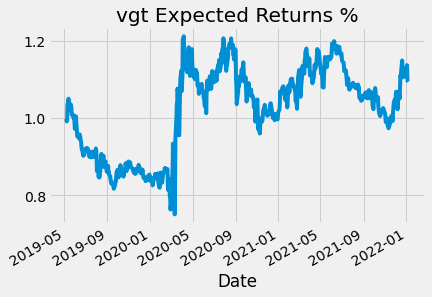

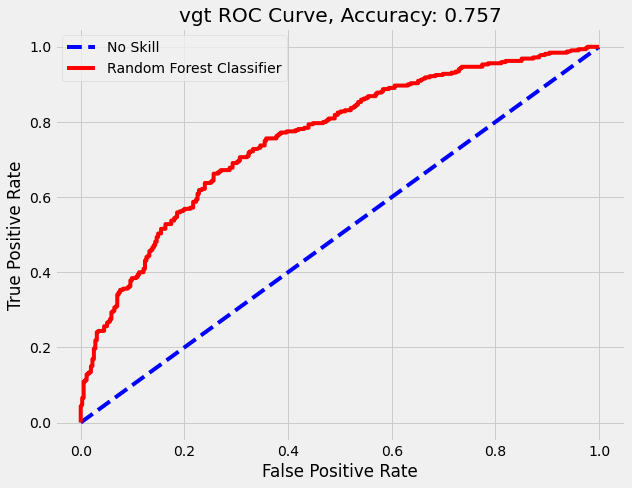

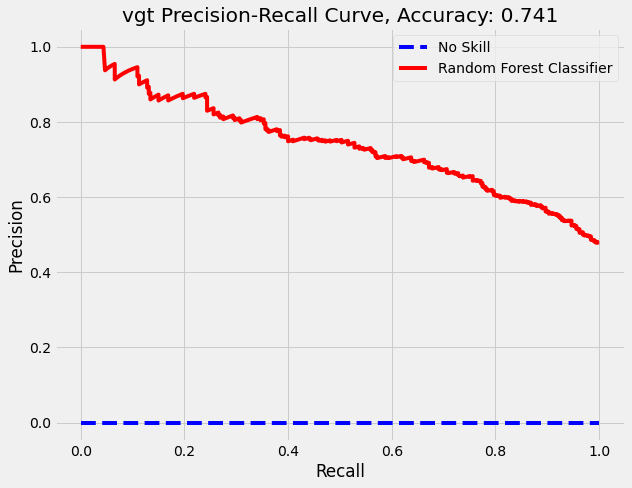

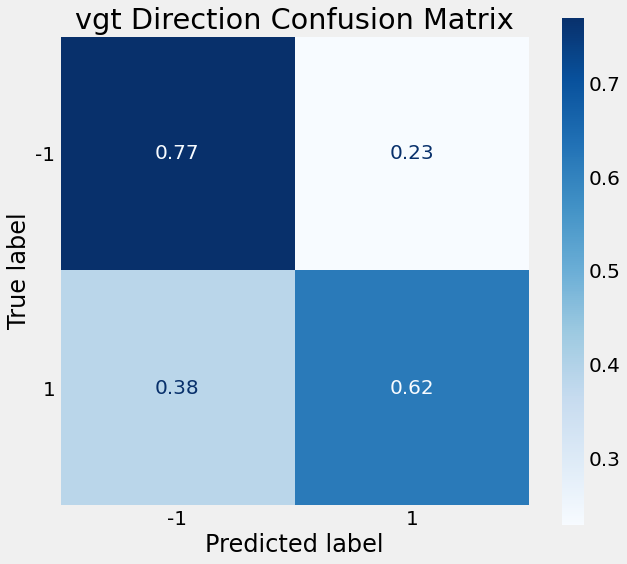

In [10]:
stock_name = 'vgt'
fn.all_func(stock_name
           , start_dates[stock_name]
           , days_ahead = 1
           , model_name = model_name
           , days_back = 1
          )

In [11]:
print("Today's date:", today)
print("Current Time =", current_time)

Today's date: 2022-01-07
Current Time = 00:39:28


In [12]:
summary_df = fn.pred_summary_df(start_dates1, stocks = [x for x in start_dates1], days_back = 1)
summary_df

,stock,Current_Price,1_Day_Pred,1_Day_Model_Return,3_Day_Pred,3_Day_Model_Return,5_Day_Pred,5_Day_Model_Return,Actual_Returns
0,a,149.119995,Buy,2.1205,Hold or Sell,2.0996,Hold or Sell,2.0071,15.6036
1,aapl,172.000000,Buy,4.7514,Buy,4.0894,Buy,5.3813,726.9370
2,adbe,514.119995,Hold or Sell,5.2041,Hold or Sell,5.8164,Hold or Sell,4.9075,143.4860
3,amat,156.339996,Hold or Sell,8.7956,Hold or Sell,9.8167,Hold or Sell,10.8524,1267.7342
4,amd,136.229996,Hold or Sell,15.0748,Buy,23.4144,Buy,30.6837,17.7903
5,amgn,225.169998,Hold or Sell,2.0410,Hold or Sell,2.3080,Hold or Sell,1.7422,348.4254
6,amzn,3265.080078,Buy,1.1694,Buy,1.1136,Buy,1.1638,260.2064
7,baba,126.629997,Hold or Sell,0.8022,Hold or Sell,0.6657,Hold or Sell,0.7556,0.6299
8,bac,48.130001,Hold or Sell,2.5852,Hold or Sell,2.2879,Hold or Sell,2.1856,66.2104
9,bby,102.879997,Buy,1.5102,Hold or Sell,1.3906,Hold or Sell,2.2642,793.0767


In [13]:
summary_df['1_Day_Model_Return'].median(), summary_df['3_Day_Model_Return'].median(), summary_df['5_Day_Model_Return'].median(), summary_df['Actual_Returns'].median()

(2.1205, 2.0996, 2.0145, 66.2104)

In [14]:
summary_df = fn.pred_summary_df(start_dates2, stocks = [x for x in start_dates2], days_back = 1)
summary_df

,stock,Current_Price,1_Day_Pred,1_Day_Model_Return,3_Day_Pred,3_Day_Model_Return,5_Day_Pred,5_Day_Model_Return,Actual_Returns
0,fslr,83.970001,Hold or Sell,1.8996,Hold or Sell,2.2877,Hold or Sell,1.8857,-0.4417
1,goog,2751.020020,Buy,2.4195,Hold or Sell,3.0190,Hold or Sell,2.5898,10.4773
2,ibm,135.339996,Buy,1.2414,Buy,1.3828,Buy,1.2936,32.1538
3,intc,54.009998,Buy,3.9939,Buy,3.7317,Buy,3.9671,233.6868
4,iyw,109.529999,Hold or Sell,2.5045,Hold or Sell,2.3510,Hold or Sell,1.6747,9.8354
5,ll,16.690001,Buy,0.8972,Buy,0.8826,Buy,1.1134,-0.2837
6,lng,109.559998,Hold or Sell,1.9111,Hold or Sell,2.0264,Hold or Sell,1.3163,25.2929
7,ma,370.000000,Hold or Sell,1.4310,Hold or Sell,1.4795,Hold or Sell,1.4218,28.0406
8,mdb,429.679993,Buy,0.8211,Buy,1.2401,Hold or Sell,0.9842,7.2774
9,msft,313.880005,Hold or Sell,7.0048,Buy,6.4329,Hold or Sell,7.5160,290.9218


In [15]:
summary_df['1_Day_Model_Return'].median(), summary_df['3_Day_Model_Return'].median(), summary_df['5_Day_Model_Return'].median(), summary_df['Actual_Returns'].median()

(1.8996, 2.0264, 1.627, 10.4773)

In [16]:
summary_df = fn.pred_summary_df(start_dates3, stocks = [x for x in start_dates3], days_back = 1)
summary_df

,stock,Current_Price,1_Day_Pred,1_Day_Model_Return,3_Day_Pred,3_Day_Model_Return,5_Day_Pred,5_Day_Model_Return,Actual_Returns
0,okta,202.220001,Hold or Sell,0.7535,Hold or Sell,0.8131,Hold or Sell,0.7782,5.7859
1,orcl,86.339996,Hold or Sell,2.5317,Buy,2.4878,Hold or Sell,2.6046,418.9120
2,qcom,185.949997,Hold or Sell,3.5201,Hold or Sell,2.7824,Hold or Sell,2.4596,88.3629
3,qqq,384.019989,Hold or Sell,1.9018,Hold or Sell,2.2886,Hold or Sell,2.4553,17.7460
4,srpt,86.900002,Hold or Sell,1.5929,Hold or Sell,1.9958,Hold or Sell,1.0129,1.6333
5,tgt,231.350006,Hold or Sell,1.6134,Hold or Sell,2.2586,Hold or Sell,2.9943,495.2369
6,tsla,1064.699951,Buy,3.3185,Buy,3.7804,Buy,4.0134,164.1210
7,tsm,128.470001,Hold or Sell,3.6621,Hold or Sell,5.8934,Hold or Sell,5.0254,24.4995
8,v,219.750000,Hold or Sell,1.6564,Hold or Sell,1.5740,Hold or Sell,1.7911,10.3498
9,vbiv,2.220000,Hold or Sell,2.6421,Hold or Sell,2.4720,Hold or Sell,3.6047,-0.9376


In [17]:
summary_df['1_Day_Model_Return'].median(), summary_df['3_Day_Model_Return'].median(), summary_df['5_Day_Model_Return'].median(), summary_df['Actual_Returns'].median()

(1.8086, 2.2586, 2.0239, 13.1899)